<a href="https://colab.research.google.com/github/ykenkou001/diveintocode-ml/blob/master/Sprint_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score,
                             precision_score, recall_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。  

・SimpleRNN  
・GRU  
・LSTM  
・ConvLSTM2D  

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。  

Keras公式のサンプルコードを利用してください。

## 【精度比較】  
・SimpleRNN =  ●Testscore:0.5746217920684814　●Test accuracy: 0.72452  
・GRU = ●Test score: 0.6656246171045304　●Test accuracy: 0.81916  
・LSTM = ●Test score: 0.5532986396789551　●Test accuracy: 0.81736  
**【考察】**  
accuracyはSimpleRNNが低く、GRUとLSTMは同程度の精度であった。

In [14]:
#SimpleRNN
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN
from keras.datasets import imdb

from functools import partial
import numpy as np
np.load = partial(np.load, allow_pickle=True)  # monkey patch


max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 70s 3ms/step - loss: 0.6922 - acc: 0.5339 - val_loss: 0.6532 - val_acc: 0.5998
Epoch 2/5
25000/25000 [==============================] - 69s 3ms/step - loss: 0.5484 - acc: 0.7209 - val_loss: 0.6132 - val_acc: 0.6462
Epoch 3/5
25000/25000 [==============================] - 69s 3ms/step - loss: 0.4644 - acc: 0.7848 - val_loss: 0.5090 - val_acc: 0.7637
Epoch 4/5
25000/25000 [==============================] - 70s 3ms/step - loss: 0.4093 - acc: 0.8208 - val_loss: 0.5453 - val_acc: 0.7316
Epoch 5/5
25000/25000 [==============================] - 8s 335us/step
Test score: 0.5746217920684814
Test accuracy: 0.72452


In [15]:
#GRU
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import GRU
from keras.datasets import imdb

from functools import partial
import numpy as np
np.load = partial(np.load, allow_pickle=True)  # monkey patch


max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 136s 5ms/step - loss: 0.4738 - acc: 0.7731 - val_loss: 0.3775 - val_acc: 0.8336
Epoch 2/5
25000/25000 [==============================] - 124s 5ms/step - loss: 0.2831 - acc: 0.8850 - val_loss: 0.3732 - val_acc: 0.8361
Epoch 3/5
25000/25000 [==============================] - 127s 5ms/step - loss: 0.1728 - acc: 0.9360 - val_loss: 0.4169 - val_acc: 0.8297
Epoch 4/5
25000/25000 [==============================] - 124s 5ms/step - loss: 0.0990 - acc: 0.9654 - val_loss: 0.5313 - val_acc: 0.8246
Epoch 5/5
25000/25000 [==============================] - 17s 688us/step
Test score: 0.6656246171045304
Test accuracy: 0.81916


1  imdb_lstm.py

In [12]:
'''
#Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

from functools import partial
import numpy as np
np.load = partial(np.load, allow_pickle=True)  # monkey patch


max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 160s 6ms/step - loss: 0.4632 - acc: 0.7821 - val_loss: 0.3890 - val_acc: 0.8272
Epoch 2/5
25000/25000 [==============================] - 157s 6ms/step - loss: 0.2968 - acc: 0.8808 - val_loss: 0.3913 - val_acc: 0.8247
Epoch 3/5
25000/25000 [==============================] - 158s 6ms/step - loss: 0.2101 - acc: 0.9182 - val_loss: 0.4795 - val_acc: 0.8248
Epoch 4/5
25000/25000 [==============================] - 162s 6ms/step - loss: 0.1488 - acc: 0.9456 - val_loss: 0.4610 - val_acc: 0.8194
Epoch 5/5
25000/25000 [==============================] - 20s 817us/step
Test score: 0.5532986396789551
Test accuracy: 0.81736


2  conv_lstm.py

Train on 95 samples, validate on 5 samples
Epoch 1/5
95/95 [==============================] - 248s 3s/step - loss: 0.8610 - val_loss: 0.6821
Epoch 2/5
95/95 [==============================] - 239s 3s/step - loss: 0.4735 - val_loss: 0.4986
Epoch 3/5
95/95 [==============================] - 238s 3s/step - loss: 0.3253 - val_loss: 0.3715
Epoch 4/5
95/95 [==============================] - 236s 2s/step - loss: 0.2390 - val_loss: 0.2555
Epoch 5/5
95/95 [==============================] - 236s 2s/step - loss: 0.1629 - val_loss: 0.2056


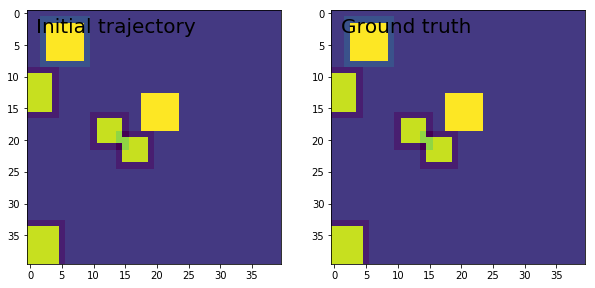

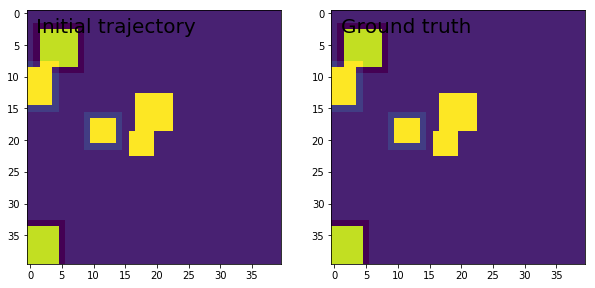

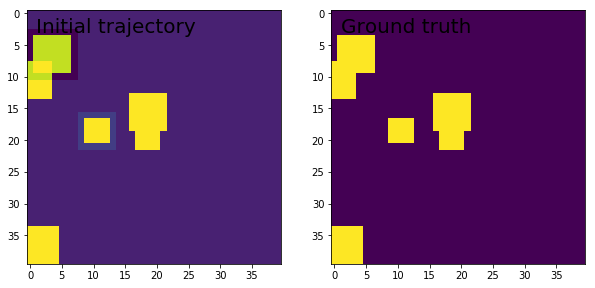

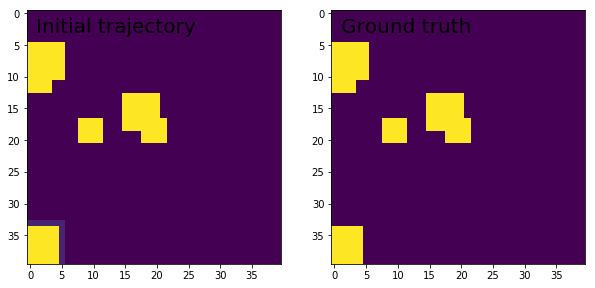

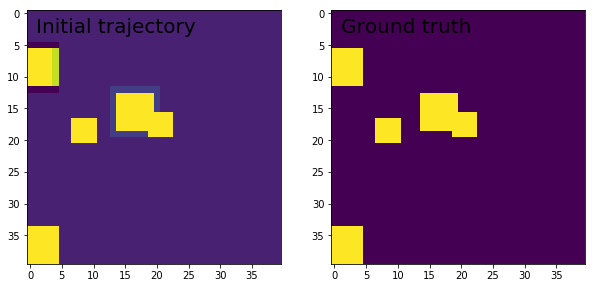

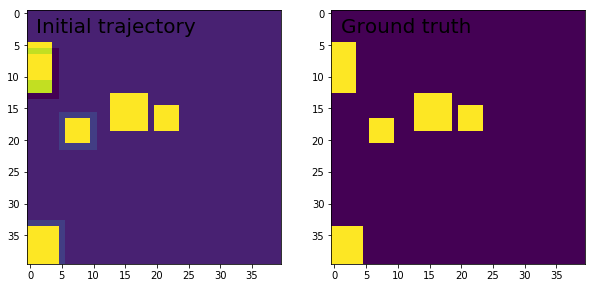

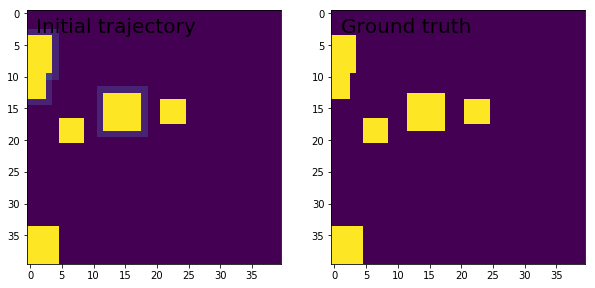

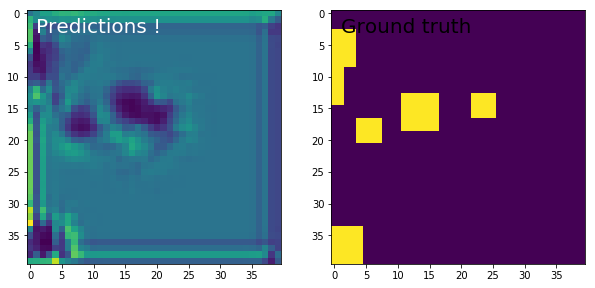

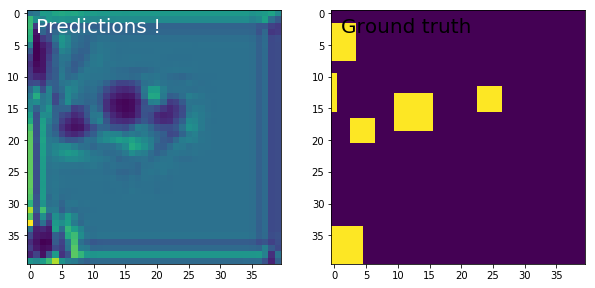

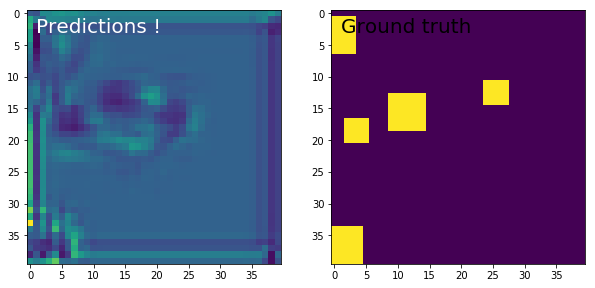

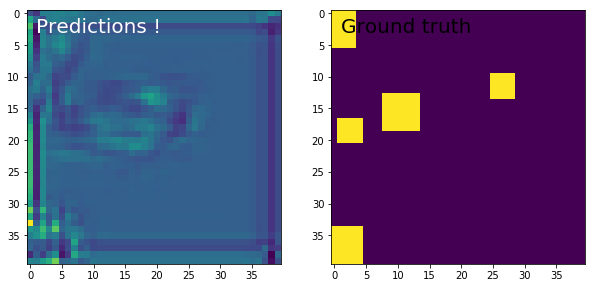

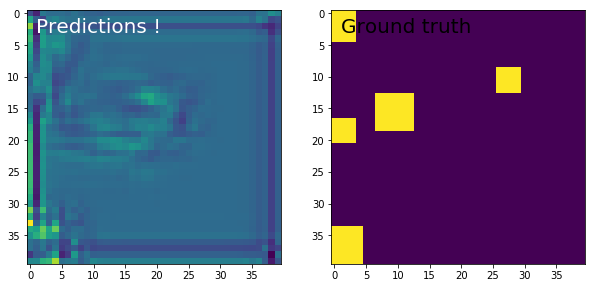

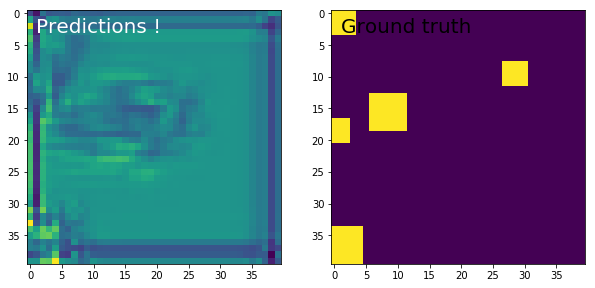

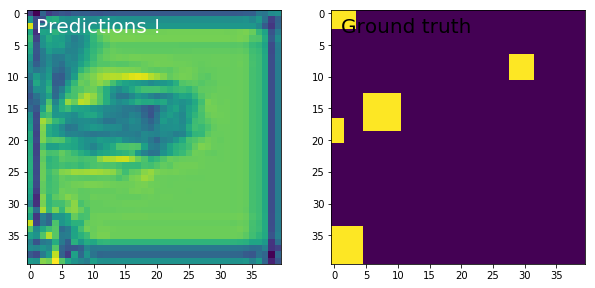

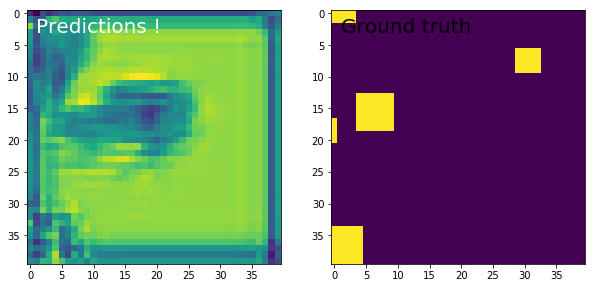

In [11]:
"""
#This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:100], shifted_movies[:100], batch_size=10,
        epochs=5, validation_split=0.05)

# 推定
# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

# 【問題2】小さな配列でのフォワードプロパゲーションの実験

### やっていません。

# 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。  
  
・RNN  
・SimpleRNNCell  
・GRUCell  
・LSTMCell  
・StackedRNNCells  
・CuDNNGRU  
・CuDNNLSTM  

### ●RNN（Recurrent Neural Networks）  
連続データの分析に適した深層学習モデル。  
循環するためにループする経路を持ち、そのループにおいて過去の情報を記憶しつつ、それをまた新しい情報へ更新しながら保持していく。  
一つのセルで行われた演算の出力を時間軸方向につなげていくネットワーク。


### ●SimpleRNNCell(単純再帰型ネットワーク)  
隠れ層が隠れ層自身に接続して、ある時点での状態を次の状態の入力値として使うことができ、時間的な情報を受け渡すことができる。  
RNNの一種でネットワークを構成する一つの演算処理をするセル。  

### ●LSTMCell(Long Short Term Memory)  
RNNでは各層で同じ重みを共有するため勾配消失や爆発を起こしやすいため、その問題を解消したモデル。  
また、LSTMのネットワークは、情報を保存するセルと3種類のゲートと呼ばれる情報の取捨選択機構を持つ。  
・Input gate：情報を書き込むかどうかを制御する(write)  
・Output gate：情報を出力するかどうかを制御する(read)  
・Forget gate：情報を削除かどうかを制御する(forget)  
　各ゲートでの情報の取捨選択は、シグモイド関数で行われる。出力が0であれば、ゲートを通さず、1であれば全て通し、仮に忘却ゲートを1にして、入力ゲートを0にすると、状態は永久に保持され続けます。実際の問題の文脈に応じて変更していく必要があります。  

忘却ゲートのおかげで、言語モデルの例では、「彼は…」と続く文が終わったときに、主語が彼であるという状態を忘れるといったことができるようになります。  
参考：https://deepage.net/deep_learning/2017/05/23/recurrent-neural-networks.html

### ●GRUCell(Gated Recurrent Unit)  
LSTMを少しシンプルにしたモデル。  
入力ゲートと忘却ゲート「更新ゲート｝として１つのゲートに統合している。

### ●StackedRNNCells  
多層RNNcellの振る舞いを単一のcellのようにするためのラッパー。  
効率的なstacked RNNを実装するために使われる．

### ●CuDNNGRU  
CuDNNを利用した高速なGRU実装．  
TensorFlowバックエンドでGPU上でのみ動作します。  

**CuDNN** **:** NVIDIAが公開しているDeep Learning用のライブラリ。このライブラリを使うとDeep Learning用のソフトウェアの速度が向上する。 この速度向上に寄与している最も大きな部分がConvolutionの高速化である。

### ●CuDNNLSTM  
CuDNNを利用した高速なLSTM実装。  
TensorFlowバックエンドでGPU上でのみ動作します。